## 데이터 분석 프로젝트 수행 절차
1. 문제 정의
2. 데이터 수집
3. 데이터 전처리 및 가공
4. 데이터 시각화 및 통찰 도출

### 1. 프로젝트 목표
- 코로나분석-1 프로젝트에서는 대한민국과 미국의 코로나 감염 현황 비율을 확인함
- 처음 얻고자하는 질문은 대한민국과 하와이의 코로나 상황임

### 2. 데이터 수집
#### 2.1 데이터 검색
- 구글에서 "us coronavirus states cases data download" 검색
- 미국 질병관리 및 예방센터(http://data.cdc.gov) 탐색
- 미국 주별 데이터 (https://data.cdc.gov/Case-Surveillance/Weekly-United-States-COVID-19-Cases-and-Deaths-by-/pwn4-m3yp)
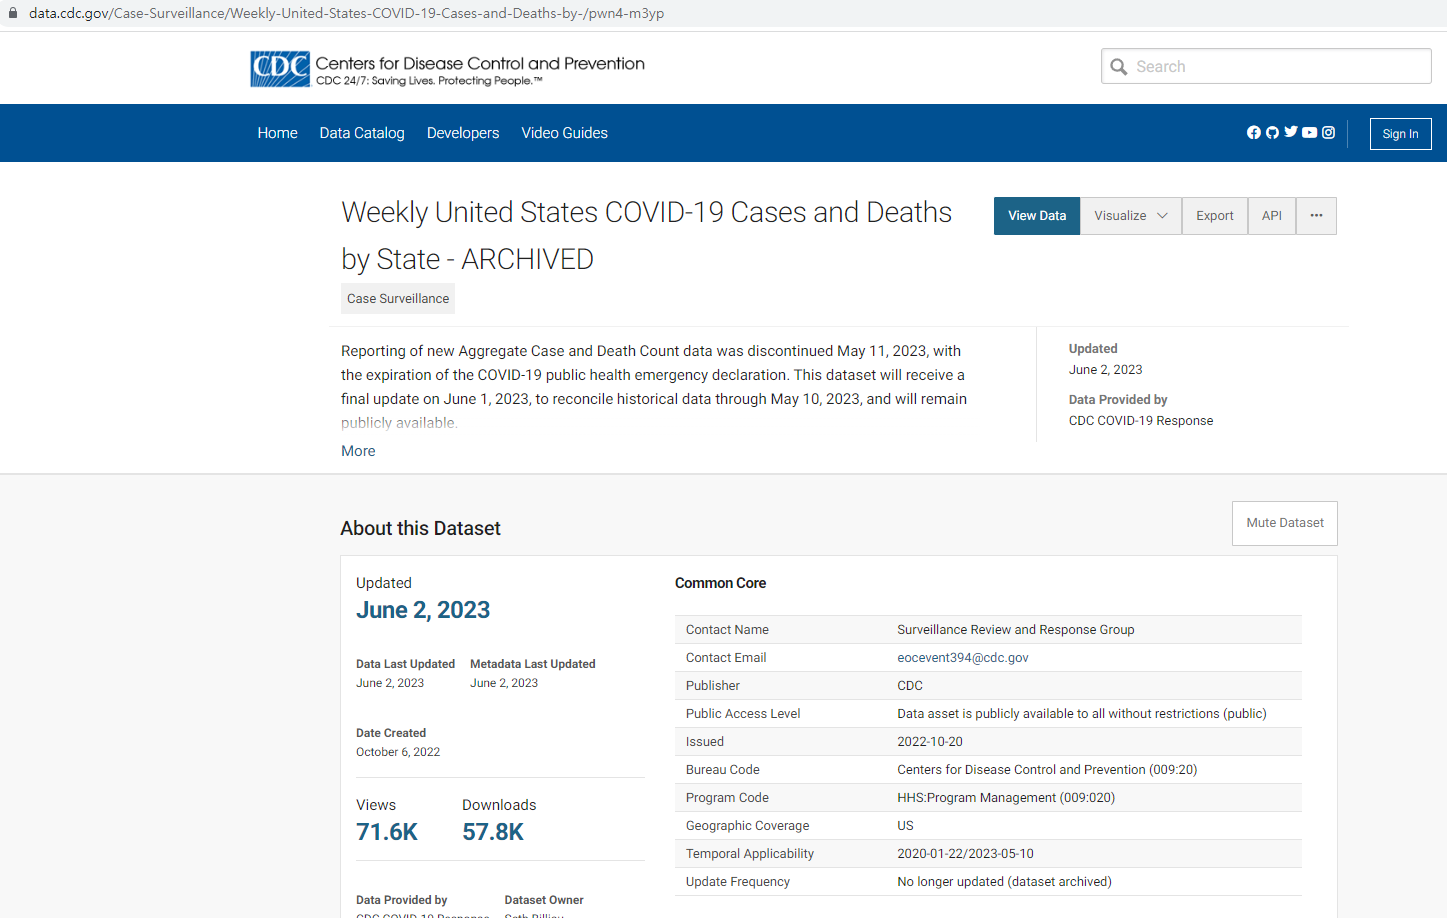


#### 2.2 데이터 가져오기 (미국 하와이)
- us-covid19.csv

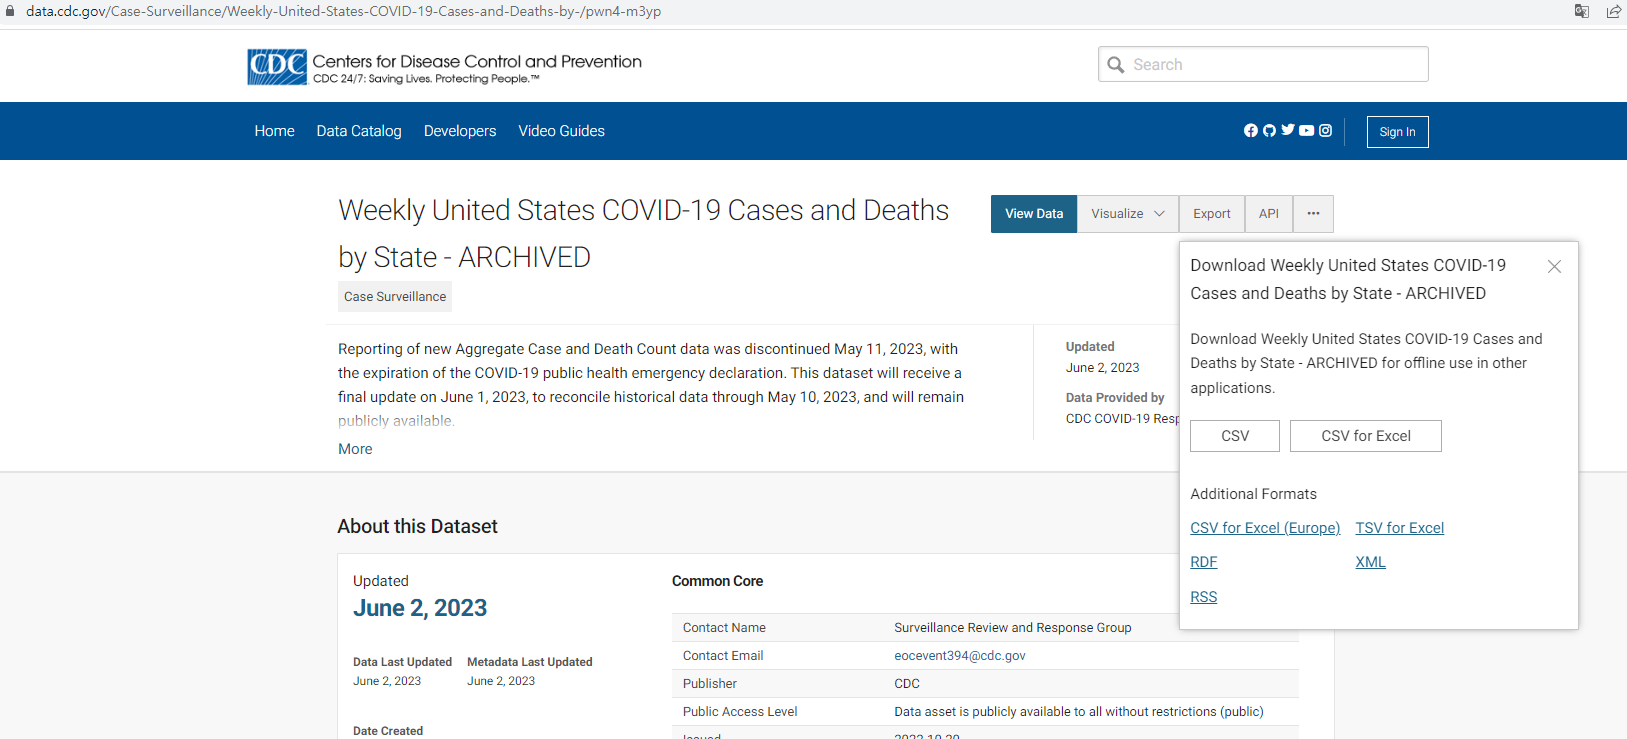

### 2.3 데이터 정제 및 가공(미국 하와이)

In [158]:
import pandas as pd

In [159]:
raw_us_covid_df = pd.read_csv("us-covid19.csv")

In [160]:
raw_us_covid_df.head()

,date_updated,state,start_date,end_date,tot_cases,new_cases,tot_deaths,new_deaths,new_historic_cases,new_historic_deaths
0,01/23/2020,AK,01/16/2020,01/22/2020,0,0,0,0,0,0
1,01/30/2020,AK,01/23/2020,01/29/2020,0,0,0,0,0,0
2,02/06/2020,AK,01/30/2020,02/05/2020,0,0,0,0,0,0
3,02/13/2020,AK,02/06/2020,02/12/2020,0,0,0,0,0,0
4,02/20/2020,AK,02/13/2020,02/19/2020,0,0,0,0,0,0


#### 하와이 데이터는 1주일 단위 누적 집계로 작성됨 .....

In [161]:
# 하와이 데이터 추출
raw_hawaii_df = raw_us_covid_df.query("state == 'HI'")
raw_hawaii_df.head()

,date_updated,state,start_date,end_date,tot_cases,new_cases,tot_deaths,new_deaths,new_historic_cases,new_historic_deaths
2422,01/23/2020,HI,01/16/2020,01/22/2020,0,0,0,0,0,0
2423,01/30/2020,HI,01/23/2020,01/29/2020,0,0,0,0,0,0
2424,02/06/2020,HI,01/30/2020,02/05/2020,0,0,0,0,0,0
2425,02/13/2020,HI,02/06/2020,02/12/2020,0,0,0,0,0,0
2426,02/20/2020,HI,02/13/2020,02/19/2020,0,0,0,0,0,0


In [199]:
raw_hawaii_df.head()

,date_updated,state,start_date,end_date,tot_cases,new_cases,tot_deaths,new_deaths,new_historic_cases,new_historic_deaths
2422,01/23/2020,HI,01/16/2020,01/22/2020,0,0,0,0,0,0
2423,01/30/2020,HI,01/23/2020,01/29/2020,0,0,0,0,0,0
2424,02/06/2020,HI,01/30/2020,02/05/2020,0,0,0,0,0,0
2425,02/13/2020,HI,02/06/2020,02/12/2020,0,0,0,0,0,0
2426,02/20/2020,HI,02/13/2020,02/19/2020,0,0,0,0,0,0


In [162]:
# 데이터 개략적 유형, 형태 알아보기
raw_hawaii_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 2422 to 2594
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   date_updated         173 non-null    object
 1   state                173 non-null    object
 2   start_date           173 non-null    object
 3   end_date             173 non-null    object
 4   tot_cases            173 non-null    int64 
 5   new_cases            173 non-null    int64 
 6   tot_deaths           173 non-null    int64 
 7   new_deaths           173 non-null    int64 
 8   new_historic_cases   173 non-null    int64 
 9   new_historic_deaths  173 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 14.9+ KB


In [163]:
# 필요한 변수만 추출
hawaii_total_cases_df = raw_hawaii_df[['date_updated', 'tot_cases']]
hawaii_total_cases_df.head()

,date_updated,tot_cases
2422,01/23/2020,0
2423,01/30/2020,0
2424,02/06/2020,0
2425,02/13/2020,0
2426,02/20/2020,0


### 2.4 대한 민국 데이터 가져오기

In [164]:
raw_df = pd.read_csv('owid-covid-data.csv')
raw_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [165]:
# 원하는 변수(컬럼) 리스트 만들기
selected_columns = ['iso_code', 'location', 'date', 'total_cases', 'population']

# 원하는 변수(컬럼)로만 구성된 데이터프레임 만들기
revised_df = raw_df[selected_columns]

# 데이터 확인하기
revised_df.head()

,iso_code,location,date,total_cases,population
0,AFG,Afghanistan,2020-01-03,NaN,41128772.0
1,AFG,Afghanistan,2020-01-04,NaN,41128772.0
2,AFG,Afghanistan,2020-01-05,NaN,41128772.0
3,AFG,Afghanistan,2020-01-06,NaN,41128772.0
4,AFG,Afghanistan,2020-01-07,NaN,41128772.0


In [166]:
# location이 "South Korea"인 데이터만 추출
kor_df = revised_df.query('location == "South Korea" ')

# 데이터 확인하기
kor_df.head(20)

,iso_code,location,date,total_cases,population
270012,KOR,South Korea,2020-01-03,NaN,51815808.0
270013,KOR,South Korea,2020-01-04,NaN,51815808.0
270014,KOR,South Korea,2020-01-05,NaN,51815808.0
270015,KOR,South Korea,2020-01-06,NaN,51815808.0
270016,KOR,South Korea,2020-01-07,NaN,51815808.0
270017,KOR,South Korea,2020-01-08,NaN,51815808.0
270018,KOR,South Korea,2020-01-09,NaN,51815808.0
270019,KOR,South Korea,2020-01-10,NaN,51815808.0
270020,KOR,South Korea,2020-01-11,NaN,51815808.0
270021,KOR,South Korea,2020-01-12,NaN,51815808.0


In [167]:
# 대한민국 확진자 수 구하기
kor_total_cases = kor_df[['date', 'total_cases']]

# 대한민국 확진자 수 확인
kor_total_cases.head()

,date,total_cases
270012,2020-01-03,NaN
270013,2020-01-04,NaN
270014,2020-01-05,NaN
270015,2020-01-06,NaN
270016,2020-01-07,NaN


In [168]:
kor_total_cases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1280 entries, 270012 to 271291
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1280 non-null   object 
 1   total_cases  1264 non-null   float64
dtypes: float64(1), object(1)
memory usage: 30.0+ KB


### 3. 데이터 시각화 - 1

### 3.1 대한민국 데이터 정제하기

In [169]:
# 대한민국 데이터 확인하기
kor_total_cases.info()
kor_total_cases.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1280 entries, 270012 to 271291
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1280 non-null   object 
 1   total_cases  1264 non-null   float64
dtypes: float64(1), object(1)
memory usage: 30.0+ KB


,date,total_cases
270012,2020-01-03,NaN
270013,2020-01-04,NaN
270014,2020-01-05,NaN
270015,2020-01-06,NaN
270016,2020-01-07,NaN


In [170]:
# 대한민국 데이터 날짜 데이터 타입으로 변경하기
kor_total_cases['date_1'] = pd.to_datetime(kor_total_cases['date'])

C:\Users\Jay\AppData\Local\Temp\ipykernel_2020\990986115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kor_total_cases['date_1'] = pd.to_datetime(kor_total_cases['date'])


In [171]:
kor_total_cases.head()

,date,total_cases,date_1
270012,2020-01-03,NaN,2020-01-03
270013,2020-01-04,NaN,2020-01-04
270014,2020-01-05,NaN,2020-01-05
270015,2020-01-06,NaN,2020-01-06
270016,2020-01-07,NaN,2020-01-07


In [172]:
kor_total_cases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1280 entries, 270012 to 271291
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1280 non-null   object        
 1   total_cases  1264 non-null   float64       
 2   date_1       1280 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 40.0+ KB


In [173]:
# 목요일을 기점으로 주 단위로 집계
kor_total_cases_w = kor_total_cases.resample(rule='1W-Thu', on='date_1').sum()
kor_total_cases_w.head()

,total_cases
date_1,
2020-01-09,0.0
2020-01-16,0.0
2020-01-23,5.0
2020-01-30,26.0
2020-02-06,114.0


In [174]:
# 날짜를 인덱스에서 다시 변수로 변환
kor_total_cases_w = kor_total_cases_w.reset_index()
kor_total_cases_w.head()

,date_1,total_cases
0,2020-01-09,0.0
1,2020-01-16,0.0
2,2020-01-23,5.0
3,2020-01-30,26.0
4,2020-02-06,114.0


### 3.2 하와이 데이터 정제하기

In [175]:
# 하와이 데이터 확인하기
hawaii_total_cases_df.info()
hawaii_total_cases_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 2422 to 2594
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date_updated  173 non-null    object
 1   tot_cases     173 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.1+ KB


,date_updated,tot_cases
2422,01/23/2020,0
2423,01/30/2020,0
2424,02/06/2020,0
2425,02/13/2020,0
2426,02/20/2020,0


In [176]:
# 하와이 데이터 날짜 데이터 타입으로 변경하기
hawaii_total_cases_df['date_1'] = pd.to_datetime(hawaii_total_cases_df['date_updated'])

C:\Users\Jay\AppData\Local\Temp\ipykernel_2020\2329791298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hawaii_total_cases_df['date_1'] = pd.to_datetime(hawaii_total_cases_df['date_updated'])


In [177]:
# 하와이 데이터 확인하기
hawaii_total_cases_df.info()
hawaii_total_cases_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 2422 to 2594
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date_updated  173 non-null    object        
 1   tot_cases     173 non-null    int64         
 2   date_1        173 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 5.4+ KB


,date_updated,tot_cases,date_1
2422,01/23/2020,0,2020-01-23
2423,01/30/2020,0,2020-01-30
2424,02/06/2020,0,2020-02-06
2425,02/13/2020,0,2020-02-13
2426,02/20/2020,0,2020-02-20


### 3.3 하와이주와 대한민국 비교하기

#### 3.3.3.1 하와이주 데이터 정제

In [178]:
hawaii_total_cases_df.head()

,date_updated,tot_cases,date_1
2422,01/23/2020,0,2020-01-23
2423,01/30/2020,0,2020-01-30
2424,02/06/2020,0,2020-02-06
2425,02/13/2020,0,2020-02-13
2426,02/20/2020,0,2020-02-20


In [179]:
# 하와이주 확진자 수 구하기
hawaii_total_cases = hawaii_total_cases_df[['date_1', 'tot_cases']]

# 대한민국 확진자 수 확인
hawaii_total_cases.head()

,date_1,tot_cases
2422,2020-01-23,0
2423,2020-01-30,0
2424,2020-02-06,0
2425,2020-02-13,0
2426,2020-02-20,0


In [180]:
# 변수명 바꾸기
hawaii_total_cases = hawaii_total_cases.rename(columns= {'tot_cases' : 'HAWAII'})

# 미국 확진자 수 확인
hawaii_total_cases.head()

,date_1,HAWAII
2422,2020-01-23,0
2423,2020-01-30,0
2424,2020-02-06,0
2425,2020-02-13,0
2426,2020-02-20,0


#### 3.3.3.2 대한민국 데이터 정제

In [181]:
kor_total_cases.head()

,date,total_cases,date_1
270012,2020-01-03,NaN,2020-01-03
270013,2020-01-04,NaN,2020-01-04
270014,2020-01-05,NaN,2020-01-05
270015,2020-01-06,NaN,2020-01-06
270016,2020-01-07,NaN,2020-01-07


In [182]:
# 대한민국 확진자 수 구하기
kor_total_cases = kor_total_cases[['date_1', 'total_cases']]

# 대한민국 확진자 수 확인
kor_total_cases.head()

,date_1,total_cases
270012,2020-01-03,NaN
270013,2020-01-04,NaN
270014,2020-01-05,NaN
270015,2020-01-06,NaN
270016,2020-01-07,NaN


In [183]:
# 변수명 바꾸기
kor_total_cases_w = kor_total_cases_w.rename(columns= {'total_cases' : 'KOR'})

# 대한민국 확진자 수 확인
kor_total_cases_w.head()

,date_1,KOR
0,2020-01-09,0.0
1,2020-01-16,0.0
2,2020-01-23,5.0
3,2020-01-30,26.0
4,2020-02-06,114.0


#### 3.3.3.3 대한민국-하와이 데이터 합치기

In [184]:
# 대한민국 데이터와 하와이 데이터 합치기
final_df = pd.merge(kor_total_cases_w, hawaii_total_cases, how = 'left', on='date_1')

In [197]:
final_df.tail(20)

,KOR,HAWAII
date_1,,
2023-02-23,6391972.59,366213.0
2023-03-02,6406335.21,366615.0
2023-03-09,6420425.88,367081.0
2023-03-16,6434978.79,367496.0
2023-03-23,6448677.93,367976.0
2023-03-30,6463392.75,369180.0
2023-04-06,6478192.56,370188.0
2023-04-13,6493851.21,371120.0
2023-04-20,6510130.47,372029.0


### 4. 데이터 시각화

In [186]:
# index를 date로 변경
final_df = final_df.set_index('date_1')

In [187]:
final_df.head(20)

,KOR,HAWAII
date_1,,
2020-01-09,0.0,NaN
2020-01-16,0.0,NaN
2020-01-23,5.0,0.0
2020-01-30,26.0,0.0
2020-02-06,114.0,0.0
2020-02-13,187.0,0.0
2020-02-20,296.0,0.0
2020-02-27,5455.0,0.0
2020-03-05,28597.0,0.0


<AxesSubplot:xlabel='date_1'>

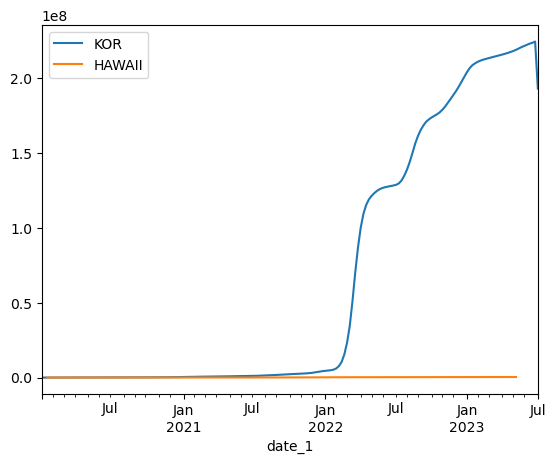

In [188]:
final_df.plot.line()

<AxesSubplot:xlabel='date_1'>

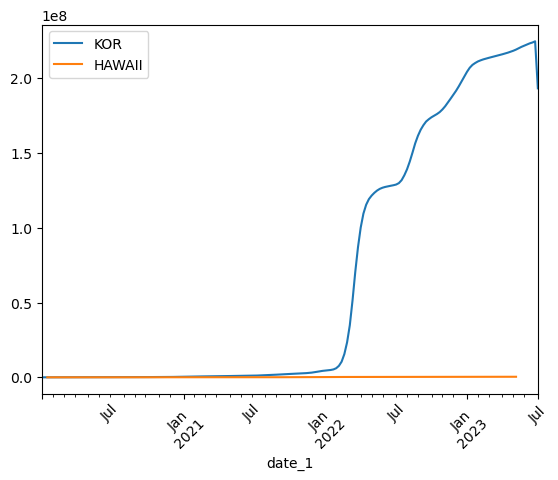

In [189]:
final_df.plot.line(rot=45)

#### 인구 수 대비 비율 알아보기

### 하와이 인구 알아보기
- google에서 학인하기 : 2022 hawaii population
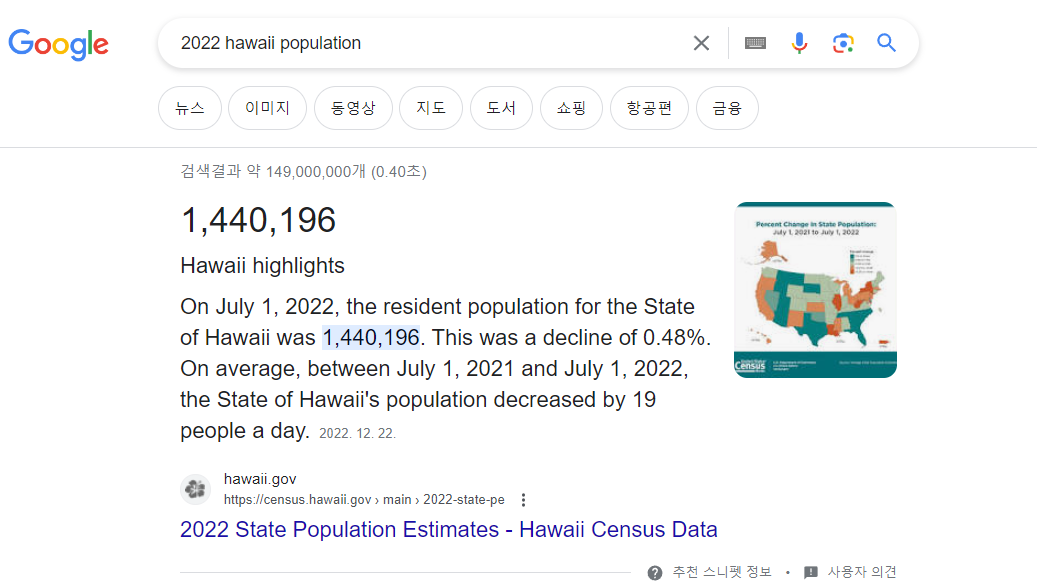

In [190]:
hawaii_population = 1440196

### 대한민국 인구 알아보기
- google에서 학인하기 : 2022 south korea population
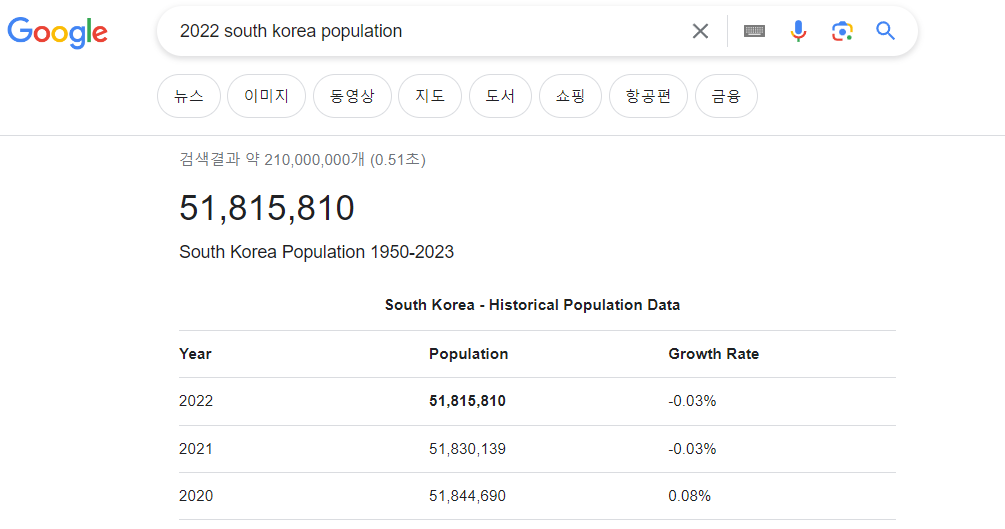

In [191]:
korea_population = 51815810

In [192]:
hawaii_rate = round((hawaii_population/korea_population), 2)
hawaii_rate

0.03

In [193]:
final_df.head()

,KOR,HAWAII
date_1,,
2020-01-09,0.0,NaN
2020-01-16,0.0,NaN
2020-01-23,5.0,0.0
2020-01-30,26.0,0.0
2020-02-06,114.0,0.0


In [194]:
#  인구수를 반영한 확진자 비율로 그리기 
final_df['KOR'] = final_df['KOR'] * hawaii_rate
final_df.head(20)

,KOR,HAWAII
date_1,,
2023-02-23,6391972.59,366213.0
2023-03-02,6406335.21,366615.0
2023-03-09,6420425.88,367081.0
2023-03-16,6434978.79,367496.0
2023-03-23,6448677.93,367976.0
2023-03-30,6463392.75,369180.0
2023-04-06,6478192.56,370188.0
2023-04-13,6493851.21,371120.0
2023-04-20,6510130.47,372029.0


<AxesSubplot:xlabel='date_1'>

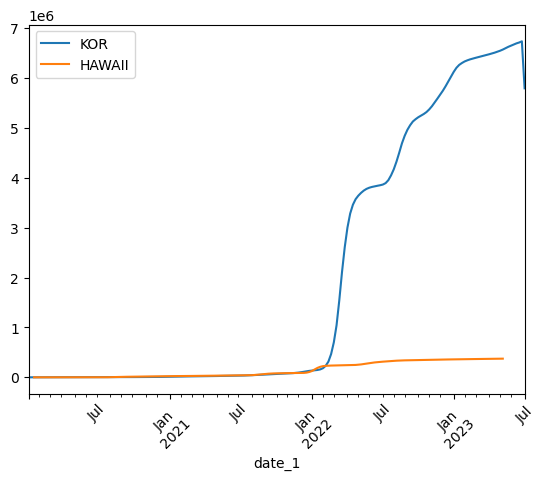

In [195]:
final_df.plot.line(rot=45)

<AxesSubplot:xlabel='date_1'>

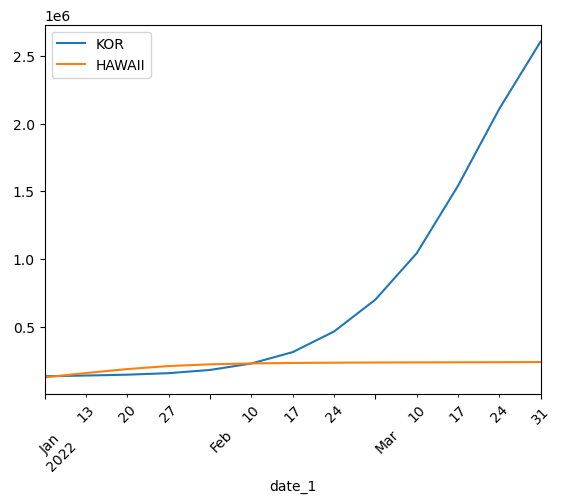

In [201]:
# 2022년 데이터만 보기
final_df['2022-01-01':'2022-03-31'].plot.line(rot=45)